## Import Necessary Libraries

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import re
import seaborn as sns

## Load Dataset

In [65]:
file_path = 'FIFA23_official_data.csv'
fifa_data = pd.read_csv(file_path)

## General information about the dataset

In [68]:
print(fifa_data.head())

       ID             Name  Age  \
0  209658      L. Goretzka   27   
1  212198  Bruno Fernandes   27   
2  224334         M. Acuña   30   
3  192985     K. De Bruyne   31   
4  224232       N. Barella   25   

                                              Photo Nationality  \
0  https://cdn.sofifa.net/players/209/658/23_60.png     Germany   
1  https://cdn.sofifa.net/players/212/198/23_60.png    Portugal   
2  https://cdn.sofifa.net/players/224/334/23_60.png   Argentina   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium   
4  https://cdn.sofifa.net/players/224/232/23_60.png       Italy   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.net/flags/de.png       87         88  FC Bayern München   
1  https://cdn.sofifa.net/flags/pt.png       86         87  Manchester United   
2  https://cdn.sofifa.net/flags/ar.png       85         85         Sevilla FC   
3  https://cdn.sofifa.net/flags/be.png       91         91    

In [70]:
eda_summary = {
    "Columns": fifa_data.columns.tolist(),
    "Shape": fifa_data.shape,
    "Missing Values": fifa_data.isnull().sum().to_dict(),
    "Data Types": fifa_data.dtypes.to_dict()
}

In [72]:
numeric_columns = fifa_data.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_columns = fifa_data.select_dtypes(include=["object"]).columns.tolist()

In [74]:
eda_summary["Numeric Columns"] = numeric_columns
eda_summary["Categorical Columns"] = categorical_columns

In [76]:
numeric_summary = fifa_data[numeric_columns].describe()

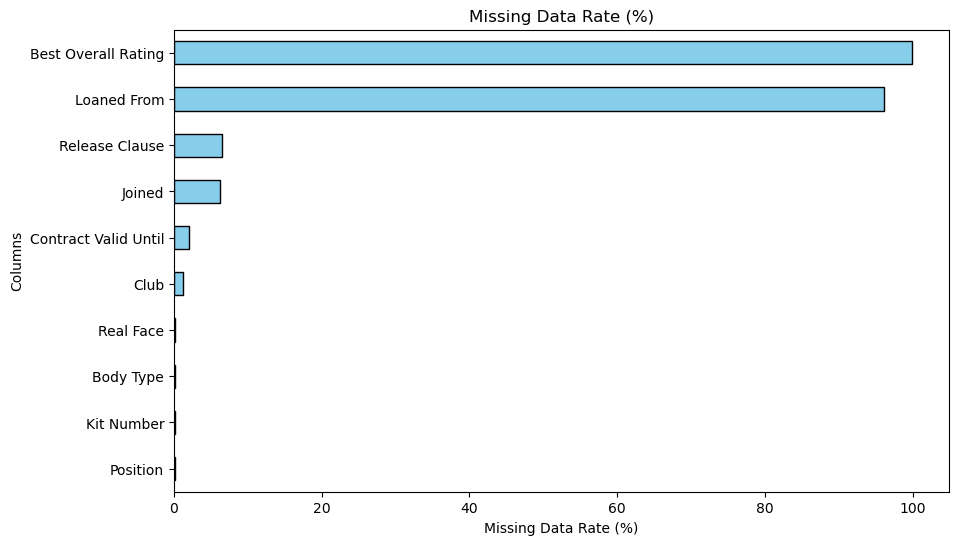

In [78]:
missing_ratios = (fifa_data.isnull().sum() / len(fifa_data)) * 100

missing_data = fifa_data.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]

plt.figure(figsize=(10, 6))
missing_data.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Missing Data Rate (%)")
plt.xlabel("Missing Data Rate (%)")
plt.ylabel("Columns")
plt.show()

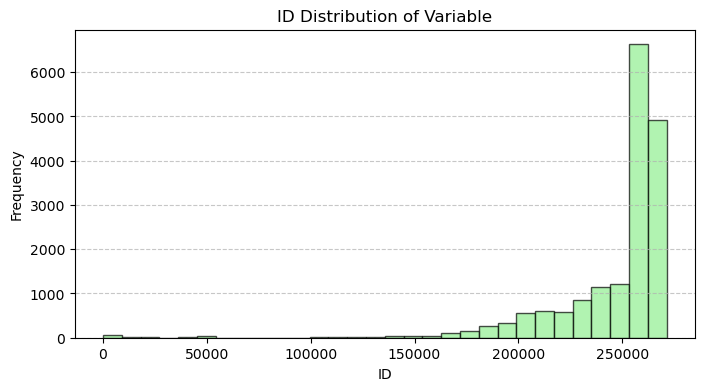

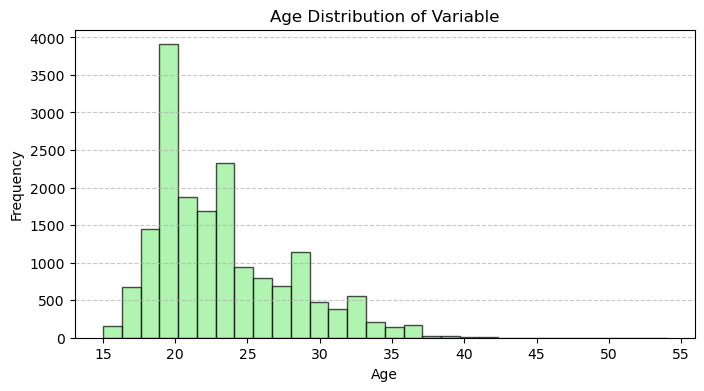

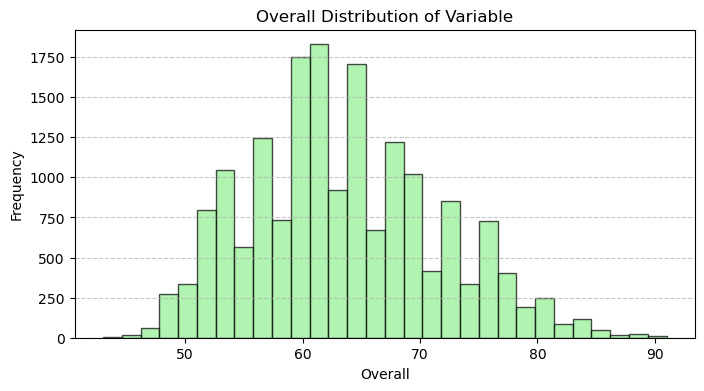

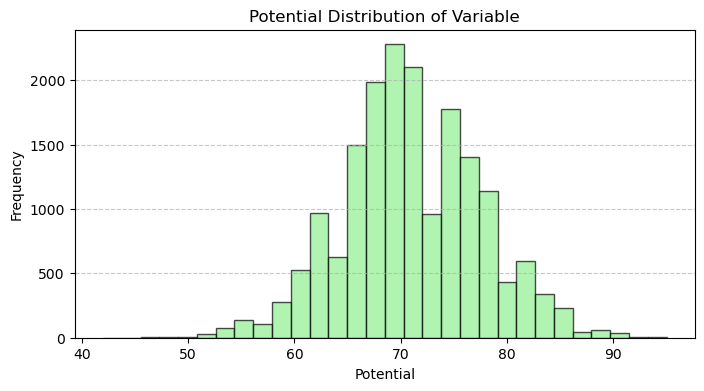

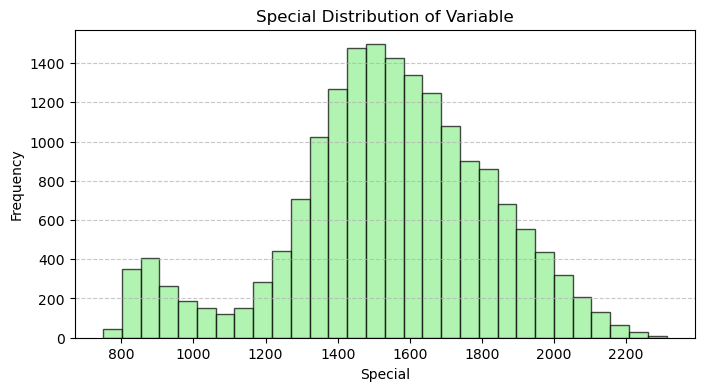

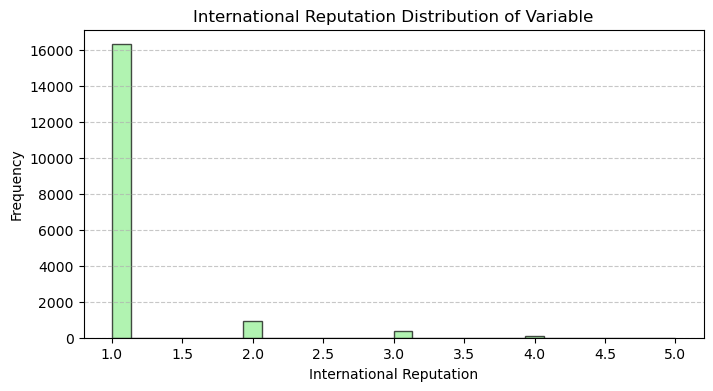

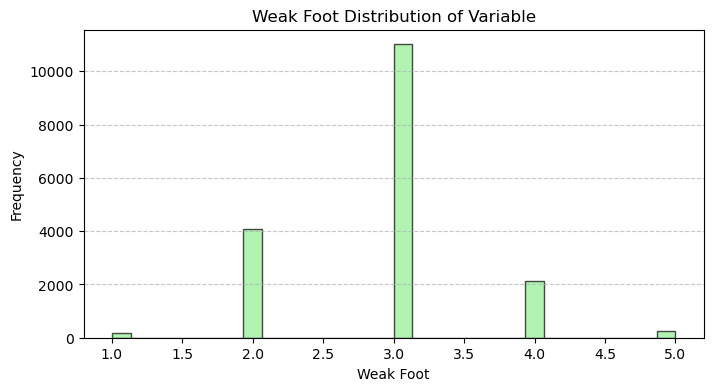

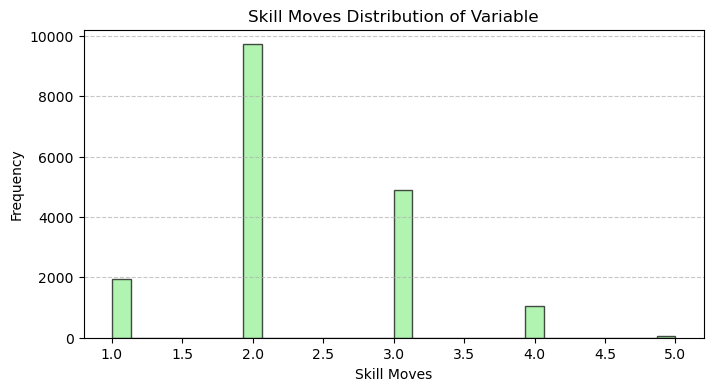

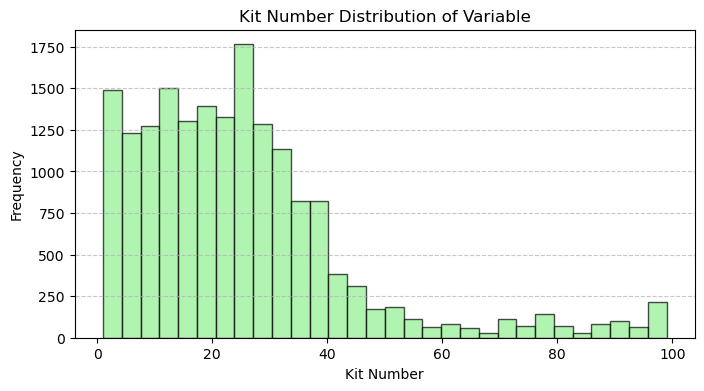

In [80]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    fifa_data[col].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.title(f"{col} Distribution of Variable")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

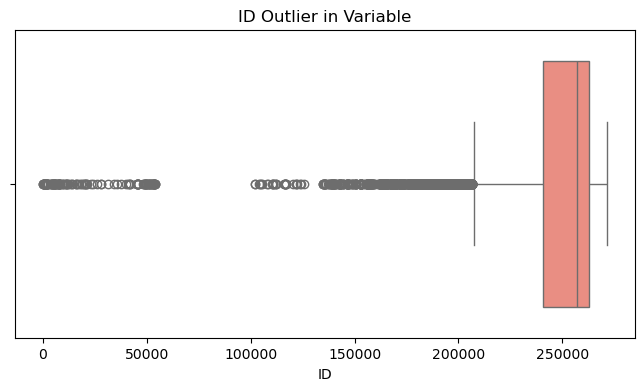

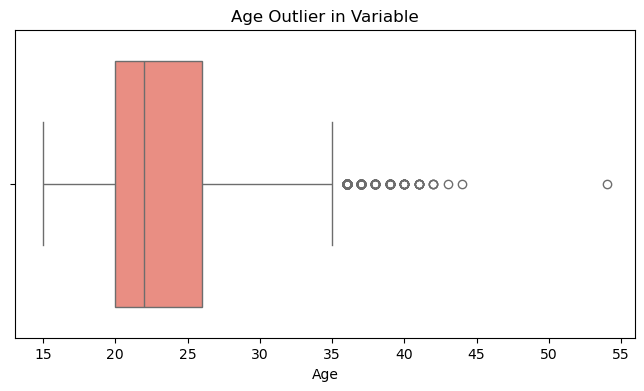

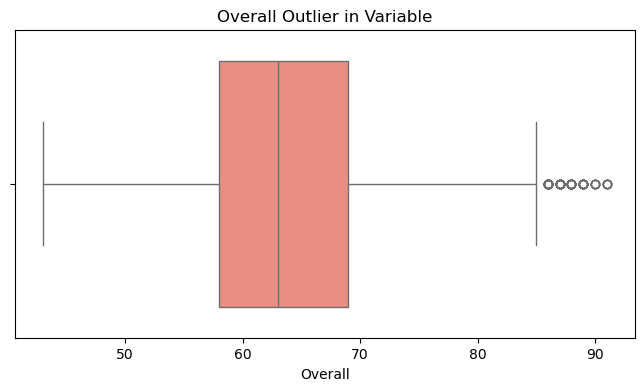

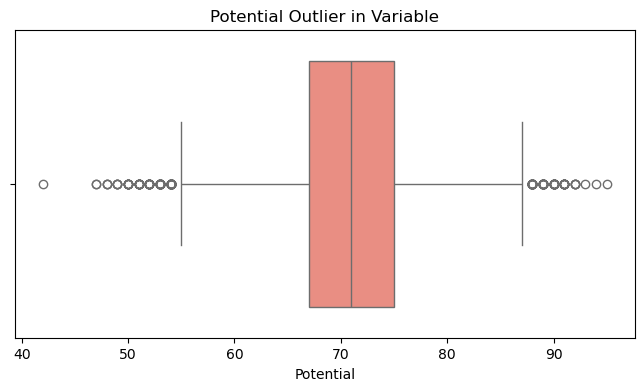

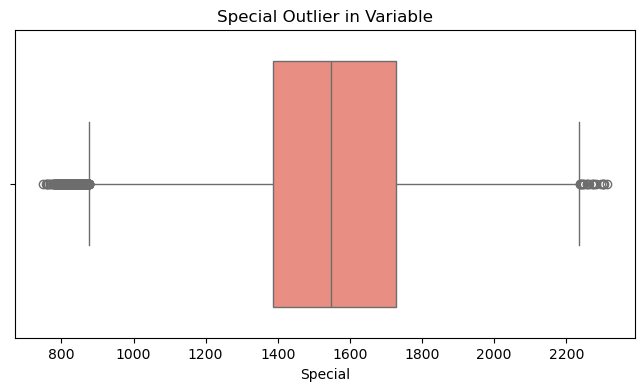

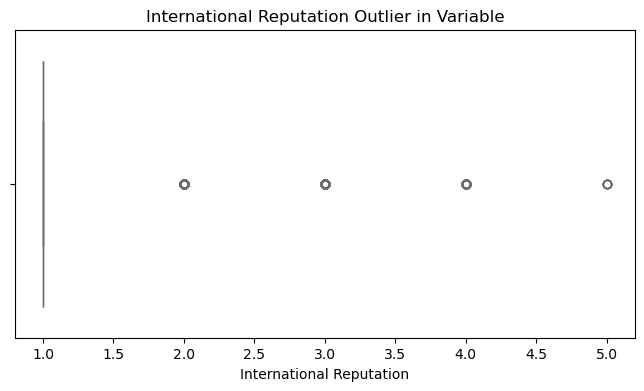

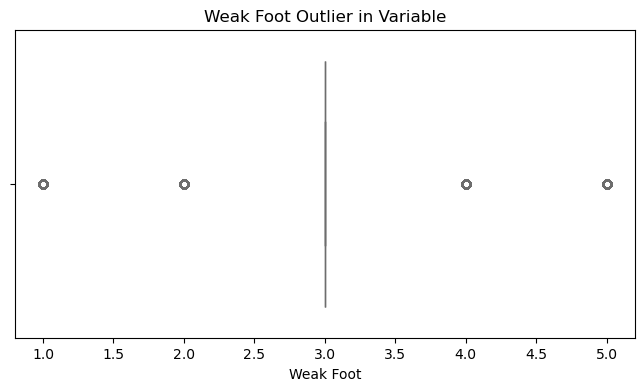

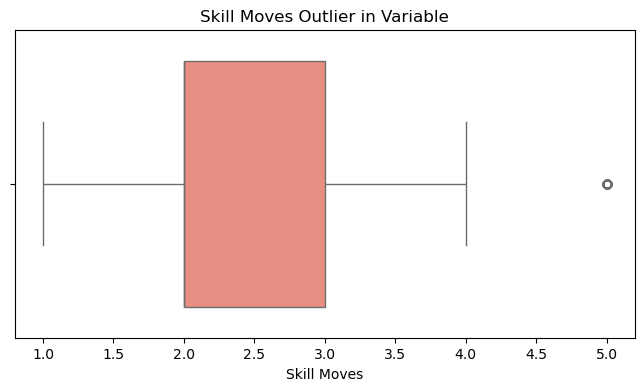

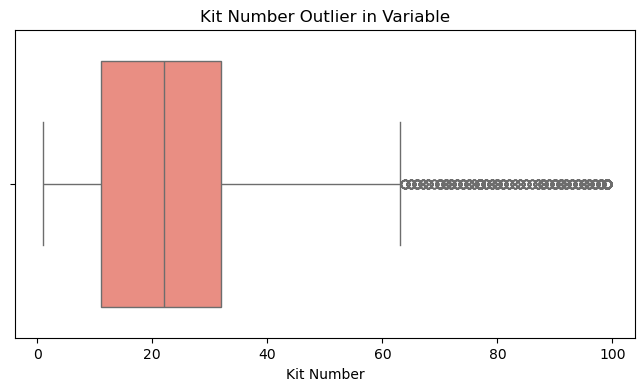

In [82]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=fifa_data[col], color='salmon')
    plt.title(f"{col} Outlier in Variable")
    plt.xlabel(col)
    plt.show()

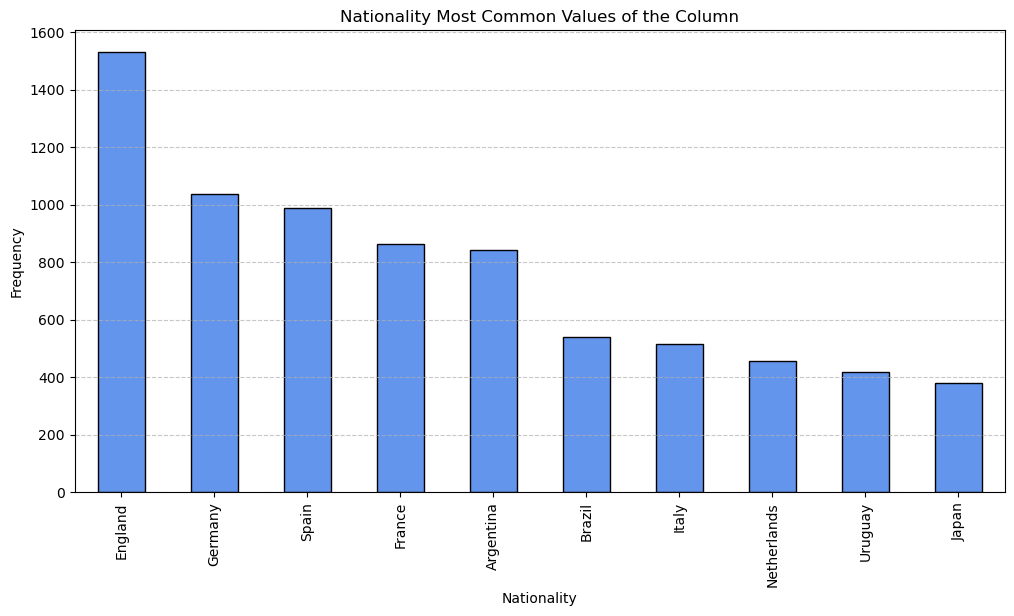

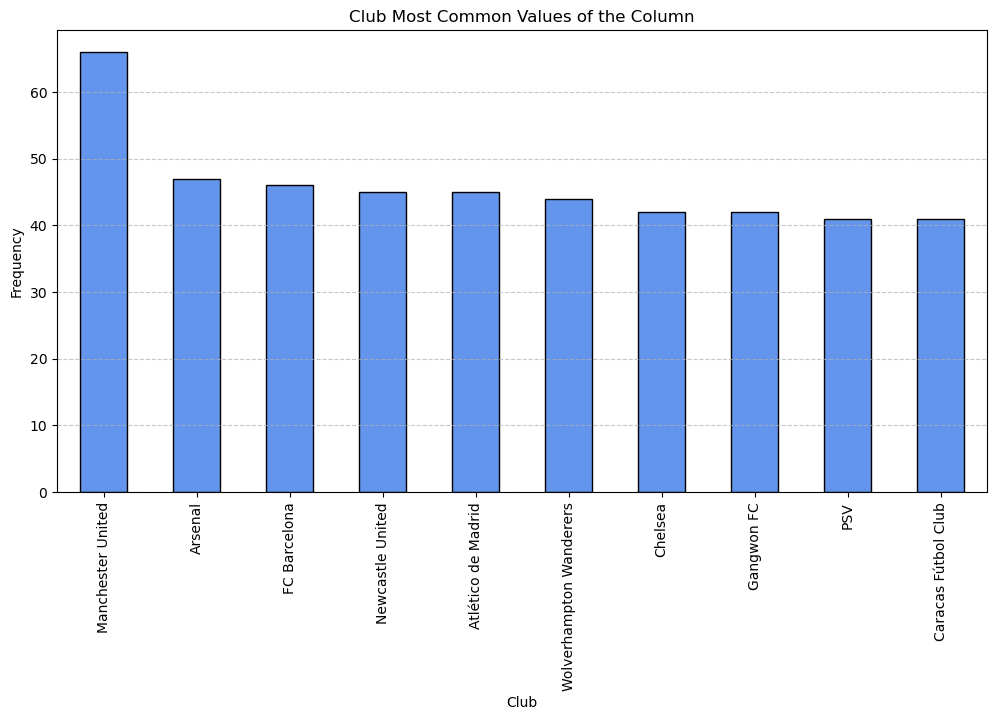

In [84]:
categorical_sample = ['Nationality', 'Club']

for col in categorical_sample:
    plt.figure(figsize=(12, 6))
    fifa_data[col].value_counts().head(10).plot(kind='bar', color='cornflowerblue', edgecolor='black')
    plt.title(f"{col} Most Common Values of the Column")
    plt.ylabel("Frequency")
    plt.xlabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

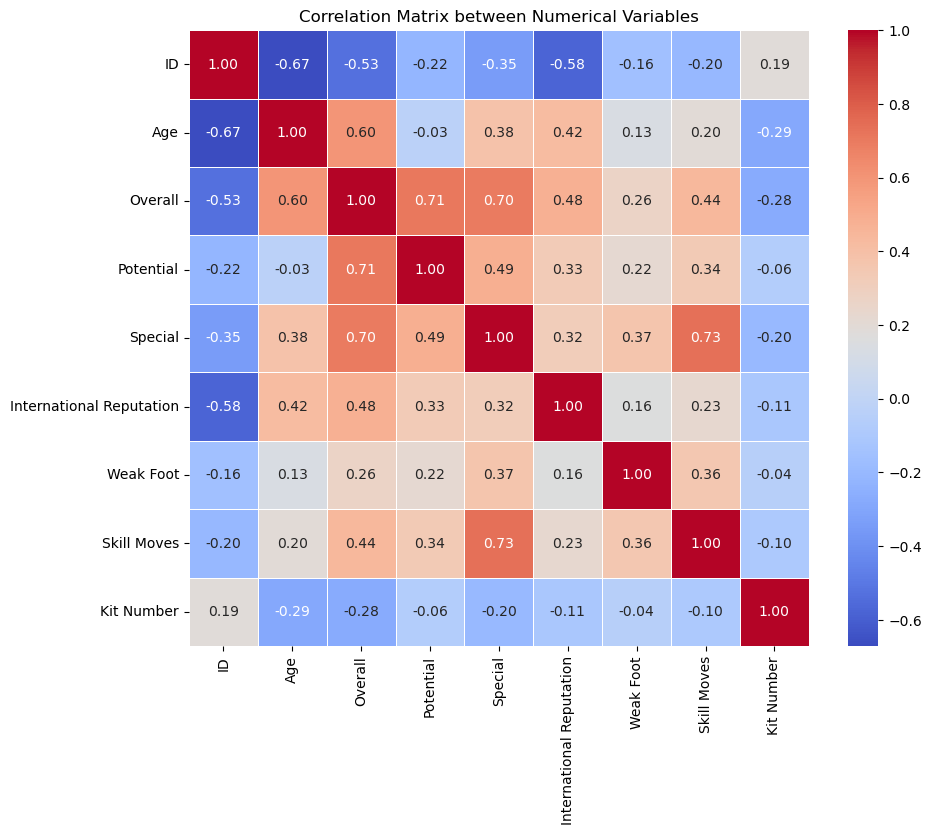

In [86]:
correlation_matrix = fifa_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix between Numerical Variables")
plt.show()

## Preporcessing

In [89]:
columns_to_drop = [
    "Photo", "Flag", "Club Logo", "ID", "Name", "Best Overall Rating", 
    "Loaned From", "Joined", "Real Face", "Kit Number", "Nationality", "Club", 
    "Contract Valid Until", "Height", "Weight", "Weak Foot", "Position", "Special", "Work Rate", "Body Type", "Preferred Foot",
    "Release Clause"
]
fifa_data_cleaned = fifa_data.drop(columns=columns_to_drop, axis=1)

In [91]:
categorical_columns_cleaned = fifa_data_cleaned.select_dtypes(include=["object"]).columns.tolist()
for col in categorical_columns_cleaned:
    fifa_data_cleaned[col].fillna(fifa_data_cleaned[col].mode()[0], inplace=True)

numeric_columns_cleaned = fifa_data_cleaned.select_dtypes(include=["float64", "int64"]).columns.tolist()
for col in numeric_columns_cleaned:
    fifa_data_cleaned[col].fillna(fifa_data_cleaned[col].mean(), inplace=True)

C:\Users\Omer\AppData\Local\Temp\ipykernel_7988\254530071.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fifa_data_cleaned[col].fillna(fifa_data_cleaned[col].mode()[0], inplace=True)
C:\Users\Omer\AppData\Local\Temp\ipykernel_7988\254530071.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [93]:
def convert_currency_safe(value):
    if isinstance(value, str):
        value = value.replace("€", "").replace("K", "e3").replace("M", "e6")
        try:
            return float(eval(value))
        except:
            return None
    return value

In [95]:
fifa_data_cleaned['Value'] = fifa_data_cleaned['Value'].apply(convert_currency_safe)
fifa_data_cleaned['Wage'] = fifa_data_cleaned['Wage'].apply(convert_currency_safe)

In [97]:
fifa_data_cleaned['Value'].fillna(fifa_data_cleaned['Value'].mean(), inplace=True)
fifa_data_cleaned['Wage'].fillna(fifa_data_cleaned['Wage'].mean(), inplace=True)

C:\Users\Omer\AppData\Local\Temp\ipykernel_7988\1990628731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fifa_data_cleaned['Value'].fillna(fifa_data_cleaned['Value'].mean(), inplace=True)
C:\Users\Omer\AppData\Local\Temp\ipykernel_7988\1990628731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [99]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fifa_data_cleaned.select_dtypes(include=["float64", "int64"]))

scaled_columns = fifa_data_cleaned.select_dtypes(include=["float64", "int64"]).columns.tolist()
fifa_data_cleaned[scaled_columns] = scaled_data

## Scaling

In [102]:
fifa_data_final = fifa_data_cleaned
print(fifa_data_final.head())

        Age   Overall  Potential      Value       Wage  \
0  0.834593  2.940553   2.606387  11.256167   5.216321   
1  0.834593  2.816114   2.453240   9.661994   8.879119   
2  1.481188  2.691675   2.146945   5.580910   1.846548   
3  1.696720  3.438311   3.065830  13.360476  16.693086   
4  0.403530  2.816114   2.759535  11.064866   4.972135   

   International Reputation  Skill Moves  
0                  7.109693     0.931837  
1                  4.652749     2.257670  
2                  2.195806     0.931837  
3                  7.109693     2.257670  
4                  4.652749     0.931837  


## Elbow Method

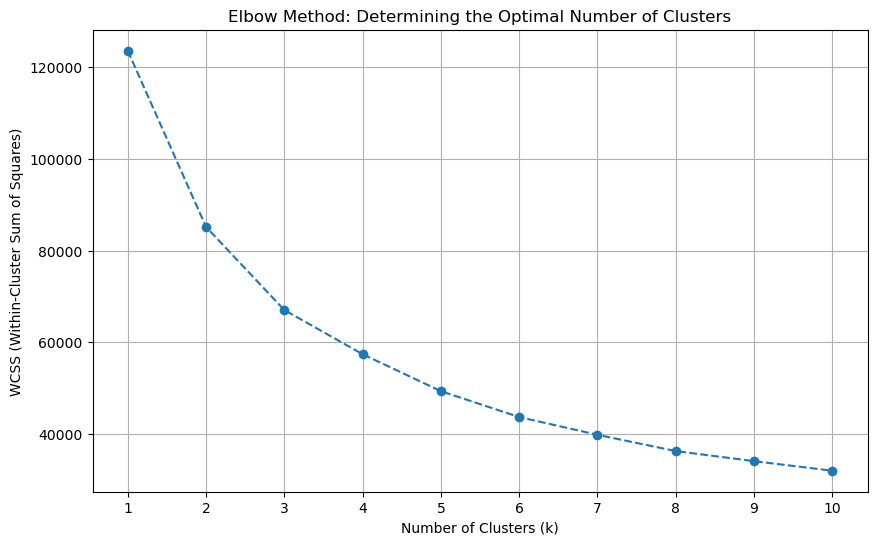

In [105]:
wcss = []
data_for_clustering = fifa_data_final.select_dtypes(include=["float64", "int64"])

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method: Determining the Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

## Silhouette Score

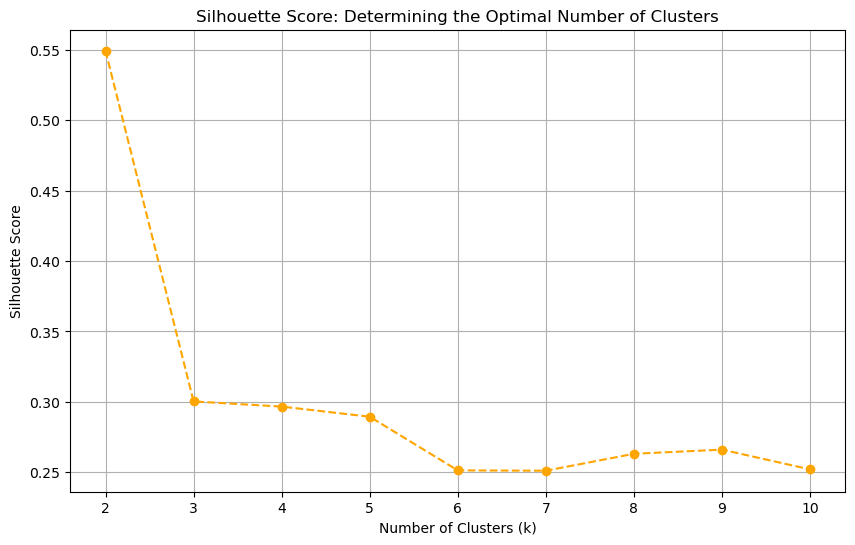

Optimal Number of Clusters (with Silhouette Score): 2


In [107]:
silhouette_scores = []
data_for_clustering = fifa_data_final.select_dtypes(include=["float64", "int64"])

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(data_for_clustering)
    cluster_labels = kmeans.labels_
    score = silhouette_score(data_for_clustering, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title("Silhouette Score: Determining the Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 11))
plt.grid()
plt.show()

optimal_k_silhouette = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters (with Silhouette Score): {optimal_k_silhouette}")

## K-means Clustering

In [110]:
optimal_k = 2
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans_model.fit(fifa_data_final)

fifa_data_final['Cluster'] = kmeans_model.labels_

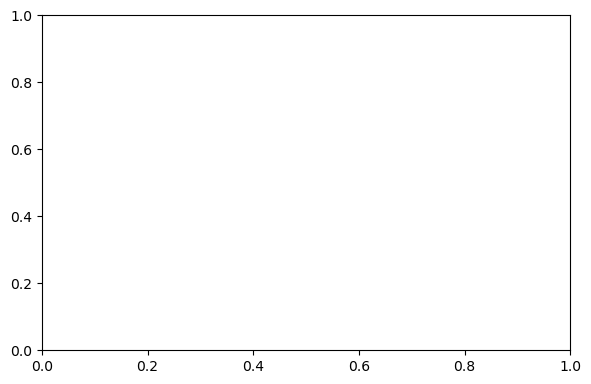

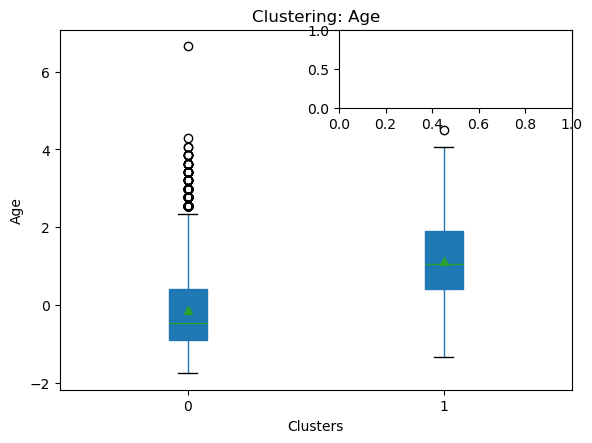

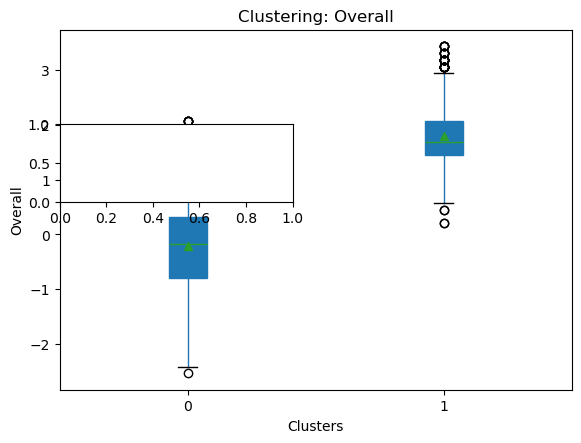

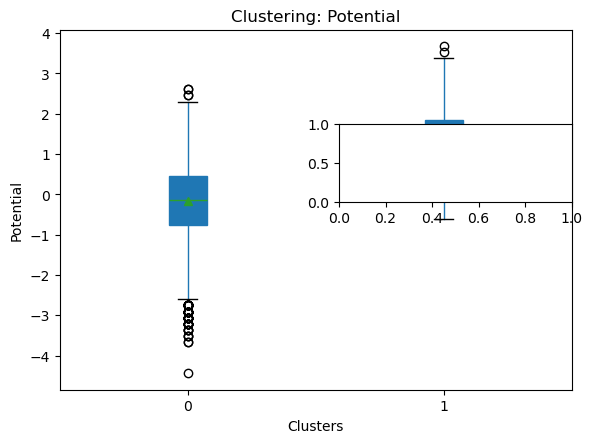

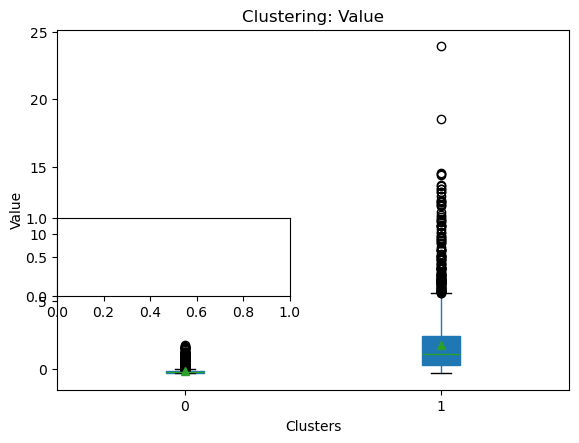

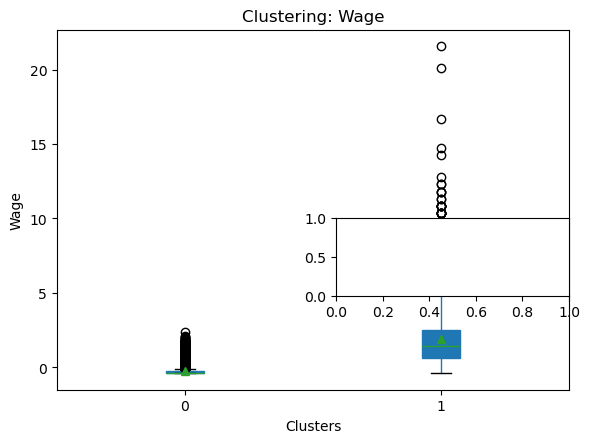

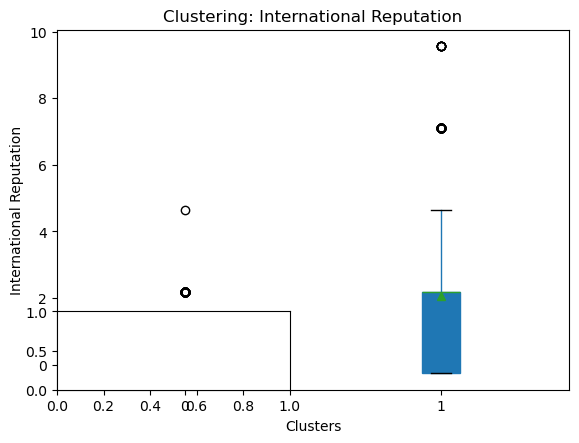

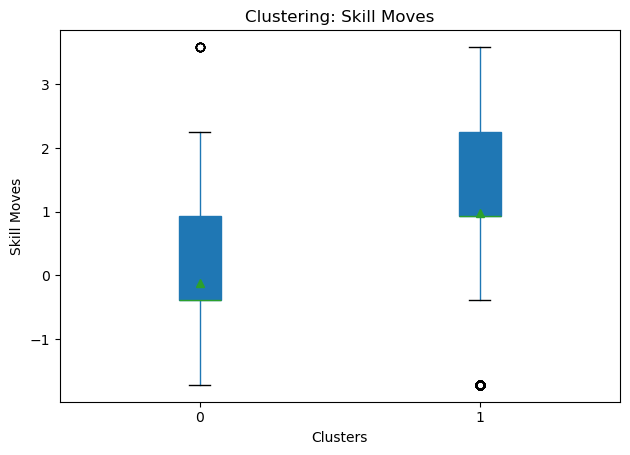

In [111]:
numeric_columns = fifa_data_final.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    if col != 'Cluster':
        plt.subplot(len(numeric_columns) // 2 + 1, 2, i)
        fifa_data_final.boxplot(column=col, by='Cluster', grid=False, showmeans=True, patch_artist=True)
        plt.title(f"Clustering: {col}")
        plt.suptitle("")
        plt.xlabel("Clusters")
        plt.ylabel(col)
plt.tight_layout()
plt.show()

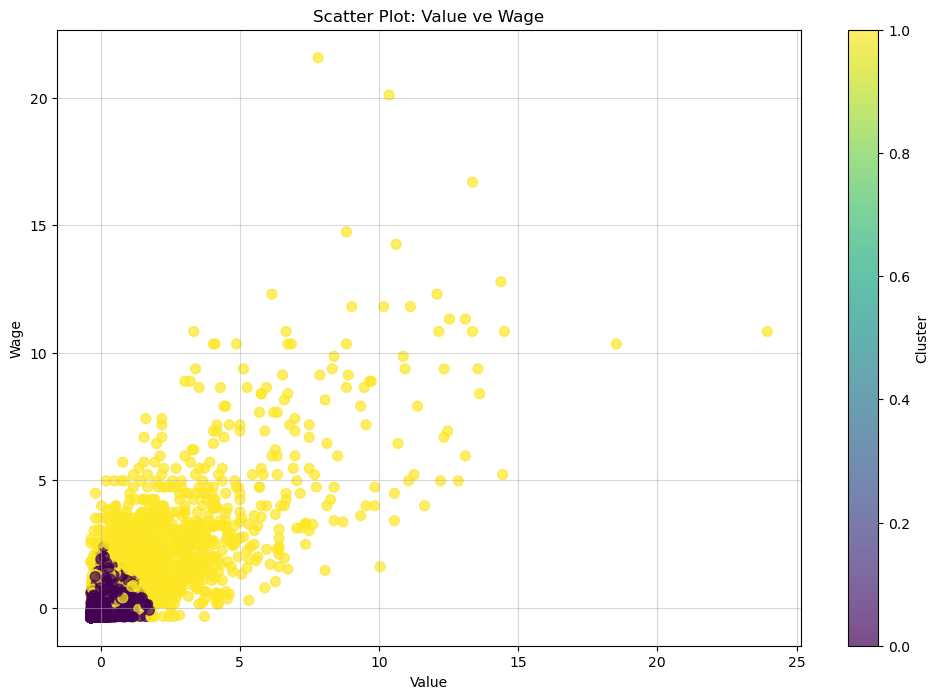

In [115]:
plt.figure(figsize=(12, 8))
plt.scatter(fifa_data_final['Value'], fifa_data_final['Wage'], c=fifa_data_final['Cluster'], cmap='viridis', alpha=0.7, s=50)
plt.title("Scatter Plot: Value ve Wage")
plt.xlabel("Value")
plt.ylabel("Wage")
plt.colorbar(label='Cluster')
plt.grid(alpha=0.5)
plt.show()

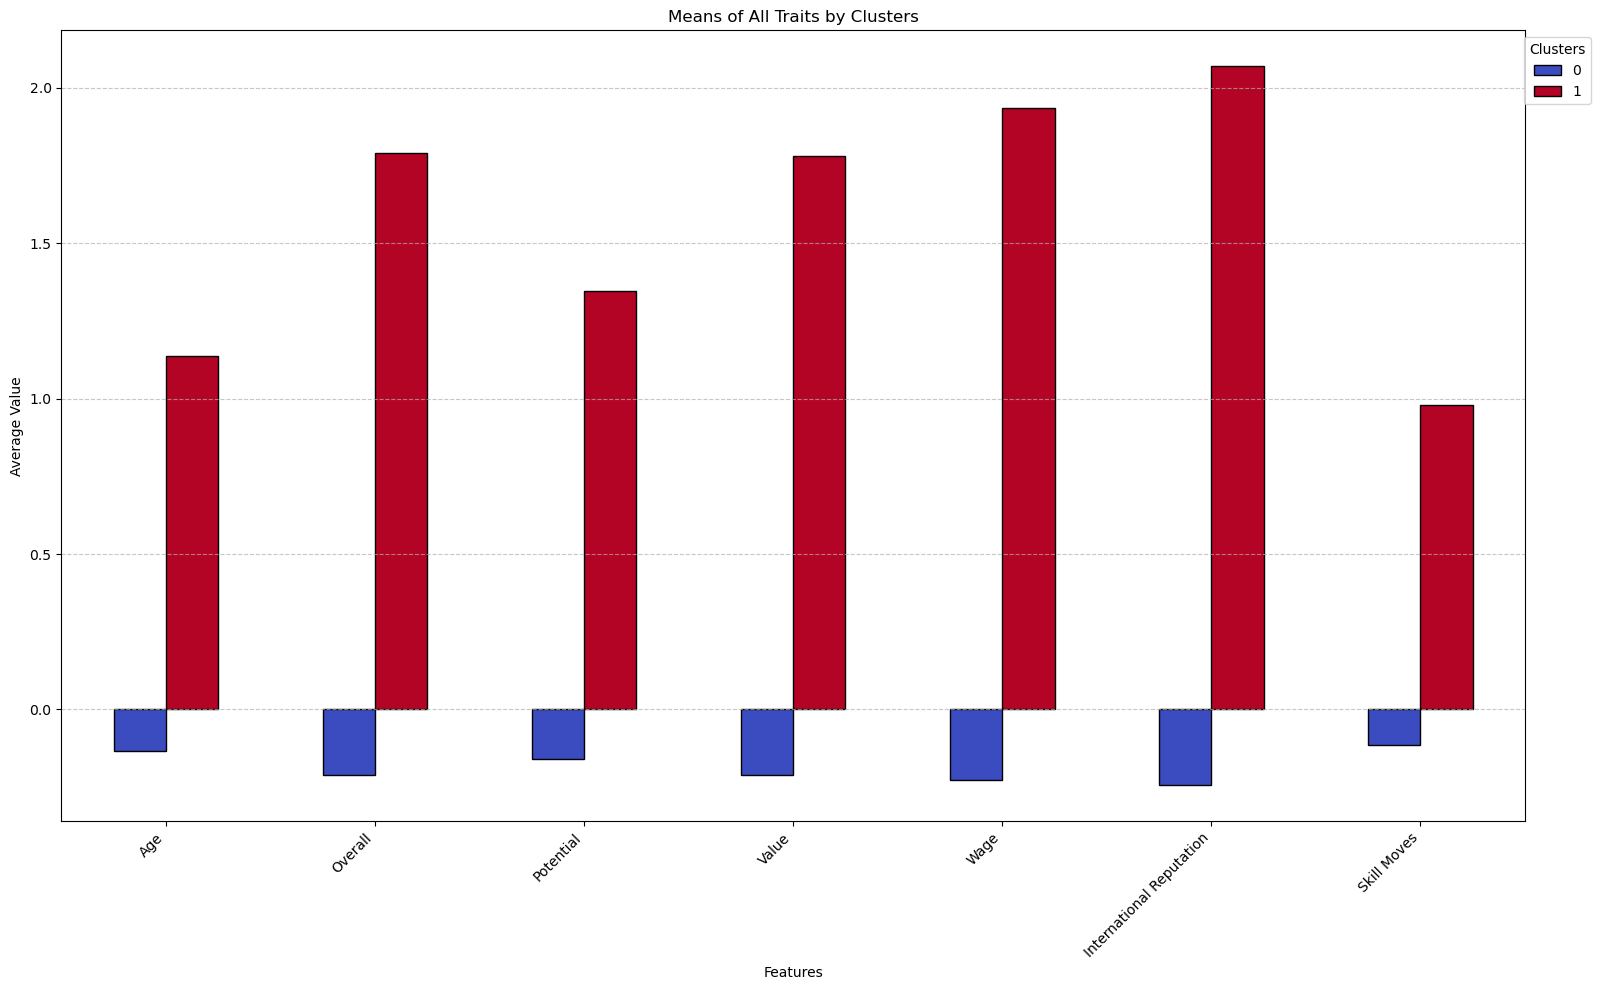

In [117]:
cluster_summary = fifa_data_final.groupby('Cluster').mean()
cluster_summary.T.plot(kind='bar', figsize=(16, 10), colormap='coolwarm', edgecolor='black')
plt.title("Means of All Traits by Clusters")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()